# Klasifikasi Kejadian Gempa Besar Menggunakan Fitur Ekstraksi Dari 512 Jam Data Seismik (Time Series Classification)


## 1. Business Understanding
### 1.1 Latar Belakang
Gempa bumi merupakan salah satu bencana alam dengan potensi kerusakan besar, terutama di wilayah rawan aktivitas seismik. Deteksi dini terhadap potensi terjadinya gempa besar menjadi aspek penting dalam sistem mitigasi bencana karena dapat memberikan waktu respons yang lebih cepat untuk pemerintah maupun masyarakat.

Dataset Earthquakes yang digunakan dalam proyek ini berasal dari Northern California Earthquake Data Center (NCEDC) dan berisi data pembacaan aktivitas seismik setiap satu jam mulai dari 1 Desember 1967 hingga 2003.

Setiap pembacaan mencerminkan intensitas aktivitas seismik per jam. Dari data mentah yang awalnya berbentuk deret waktu tunggal (single time series), dilakukan transformasi menjadi dataset klasifikasi dengan cara:

- Kelas positif (gempa besar) ditandai jika pembacaan magnitudo > 5.0
- Data positif hanya dipilih jika tidak ada gempa besar lain dalam 512 jam sebelumnya, untuk menghindari aftershocks
- Kelas negatif (tidak gempa besar) dipilih pada pembacaan < 4.0 dan memiliki ≥ 20 pembacaan non-zero dalam 512 jam sebelumnya
-Setiap sampel terdiri dari 512 fitur, menggambarkan 512 jam aktivitas seismik sebelumnya

Dengan menggunakan pendekatan ini, dataset menjadi set yang ideal untuk mengembangkan model klasifikasi untuk memprediksi apakah sebuah major event akan terjadi dalam waktu dekat berdasarkan pola 512 jam sebelumnya.

### 1.2 Tujuan Proyek

Tujuan dari proyek ini adalah:
- Mengembangkan model klasifikasi yang dapat memprediksi apakah sebuah segmen 512 jam aktivitas seismik akan diikuti oleh kejadian gempa besar.
- Menganalisis pola aktivitas seismik yang membedakan antara kondisi menuju gempa besar dan kondisi normal.
- Melakukan data preprocessing, analisis data, dan pelatihan model machine learning pada dataset Earthquakes.
- Menghasilkan model prediktif yang akurat, yang dapat digunakan sebagai bagian dari sistem deteksi dini berbasis AI.

### 1.3 Kriteria Keberhasilan

Proyek dikatakan berhasil apabila memenuhi kriteria berikut:
- Model mencapai akurasi minimal 80% dalam membedakan data gempa dan tidak gempa.
- Model memiliki recall tinggi untuk kelas gempa besar, karena kesalahan melewatkan gempa lebih kritis dibanding false alarm.
- Pipeline data (preprocessing → modelling → evaluasi) berjalan stabil dan dapat digunakan kembali.
- Hasil evaluasi dapat dijelaskan secara logis melalui metrik seperti confusion matrix, precision, recall, dan F1-score.
- Dapat menghasilkan kesimpulan yang dapat digunakan untuk pengambilan keputusan dalam konteks analisis seismik jangka pendek.

## 2. Data Understanding

Dataset Earthquakes disusun dari data asli 86.066 jam pembacaan seismik, yang kemudian disegmentasi menjadi:
- 93 sampel positif (kejadian gempa besar)
- 368 sampel negatif (tidak gempa besar)
- Total 461 sampel untuk dataset utama

Ciri utama dataset:
- Data mentah: satu nilai intensitas seismik per jam
- Data final: setiap sampel berisi 512 fitur → yaitu 512 jam sebelum kondisi tertentu
- Tidak ada missing value
- Data telah dinormalisasi/terstandarisasi sehingga sebagian besar nilai berada dalam rentang kecil (positif/negatif)

Tujuan utama pada tahap ini adalah memastikan:
- Dimensi data benar (461 × 513)
- Proporsi label seimbang atau tidak (dataset ini cenderung imbalanced, kelas gempa hanya 20%)
- Fitur mencerminkan pola time series yang sudah ditransformasikan

MEMULAI DATA UNDERSTANDING...

2.1 Memuat Dataset Earthquakes...
   - Total Sampel Gabungan : 461
   - Jumlah Fitur per Sampel : 512 (512 titik waktu)

2.2 Informasi Statistik Dasar...
   - Nilai Minimum      : -0.8858
   - Nilai Maksimum      : 7.8634
   - Rata-rata Fitur     : 0.0000
   - Standar Deviasi     : 0.9990
   - Jumlah Missing Value: 0
   - Jumlah Infinity     : 0

2.3 Distribusi Kelas (Angka)...
   - Kelas 0 (Tidak Gempa) : 368 sampel
   - Kelas 1 (Gempa Besar) : 93 sampel

2.4 Membuat Visualisasi Distribusi Kelas...


/tmp/ipykernel_9188/1612460751.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y_total, palette="viridis")


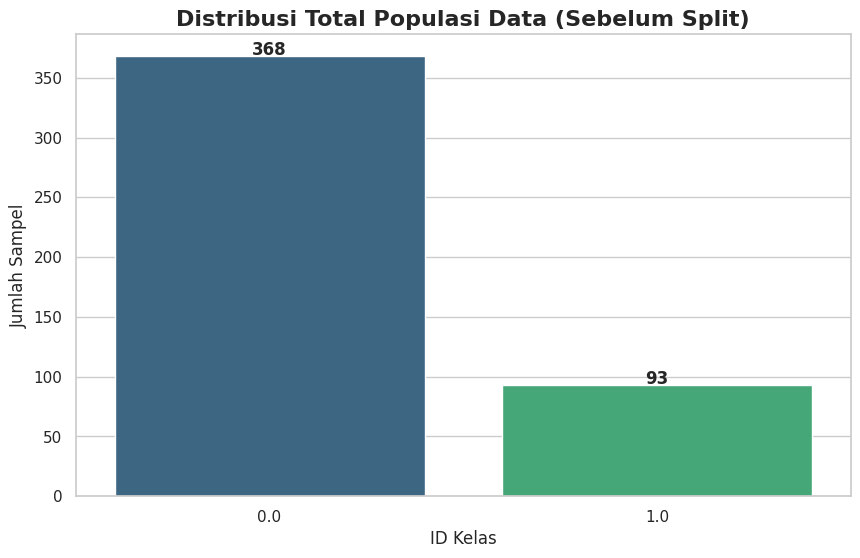


2.5 Menampilkan Contoh Pola Sinyal...


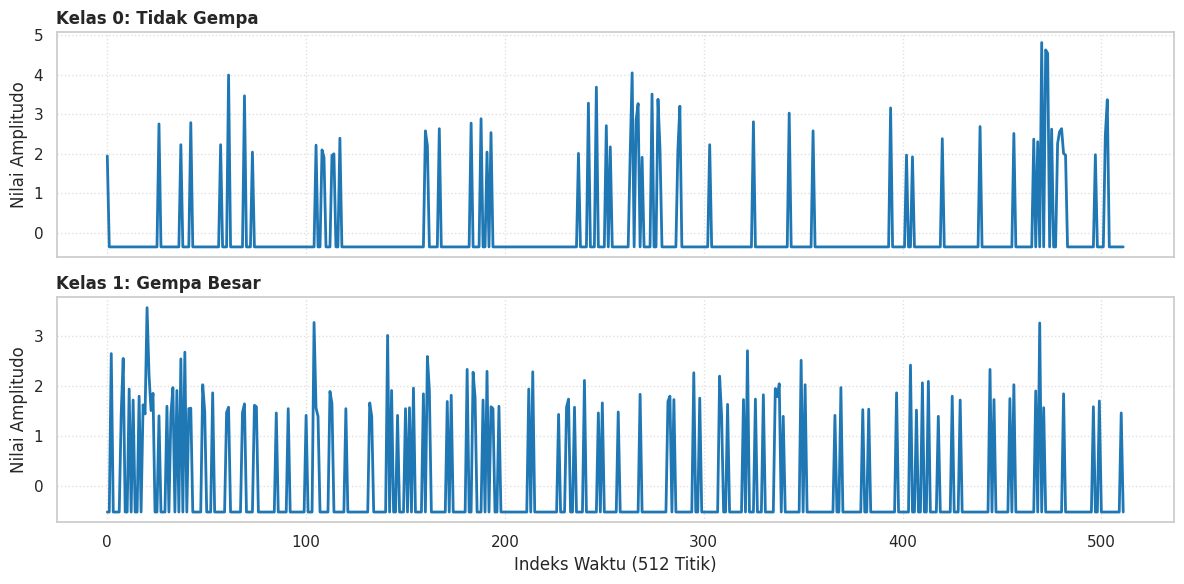


=== DATA UNDERSTANDING SELESAI ===


In [13]:
# 2. DATA UNDERSTANDING (FINAL VERSION)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

print("MEMULAI DATA UNDERSTANDING...")
print("====================================================")

# 2.1 MEMUAT DATASET EARTHQUAKES
print("\n2.1 Memuat Dataset Earthquakes...")

train = np.loadtxt("Data/Earthquakes_TRAIN.txt")
test  = np.loadtxt("Data/Earthquakes_TEST.txt")

X_total = np.vstack([train[:,1:], test[:,1:]])
y_total = np.concatenate([train[:,0], test[:,0]])

print(f"   - Total Sampel Gabungan : {X_total.shape[0]}")
print(f"   - Jumlah Fitur per Sampel : {X_total.shape[1]} (512 titik waktu)")

# 2.2 INFORMASI STATISTIK DASAR
print("\n2.2 Informasi Statistik Dasar...")

print(f"   - Nilai Minimum      : {X_total.min():.4f}")
print(f"   - Nilai Maksimum      : {X_total.max():.4f}")
print(f"   - Rata-rata Fitur     : {X_total.mean():.4f}")
print(f"   - Standar Deviasi     : {X_total.std():.4f}")
print(f"   - Jumlah Missing Value: {np.isnan(X_total).sum()}")
print(f"   - Jumlah Infinity     : {np.isinf(X_total).sum()}")

# 2.3 DISTRIBUSI KELAS (ANGKA)
print("\n2.3 Distribusi Kelas (Angka)...")

unique, counts = np.unique(y_total, return_counts=True)
for lbl, cnt in zip(unique.astype(int), counts):
    name = "Gempa Besar" if lbl == 1 else "Tidak Gempa"
    print(f"   - Kelas {lbl} ({name}) : {cnt} sampel")

# 2.4 VISUALISASI DISTRIBUSI KELAS
print("\n2.4 Membuat Visualisasi Distribusi Kelas...")

plt.figure(figsize=(10,6))
ax = sns.countplot(x=y_total, palette="viridis")

plt.title("Distribusi Total Populasi Data (Sebelum Split)", fontsize=16, fontweight="bold")
plt.xlabel("ID Kelas", fontsize=12)
plt.ylabel("Jumlah Sampel", fontsize=12)

# Tampilkan jumlah sampel di atas bar
counts = np.bincount(y_total.astype(int))
for i, count in enumerate(counts):
    ax.text(i, count + 1, str(count), ha='center', fontsize=12, weight="bold")

plt.show()

# 2.5 VISUALISASI POLA SINYAL (SAMPLE PER KELAS)
print("\n2.5 Menampilkan Contoh Pola Sinyal...")

kelas_names = {0: "Tidak Gempa", 1: "Gempa Besar"}

fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

for i, class_id in enumerate([0, 1]):
    # Ambil satu sampel pertama untuk kelas ini
    idx = np.where(y_total == class_id)[0][0]
    series_sample = X_total[idx]

    axes[i].plot(series_sample, color="#1f77b4", linewidth=2)
    axes[i].set_title(f"Kelas {class_id}: {kelas_names[class_id]}", 
                      fontweight="bold", loc="left")
    axes[i].set_ylabel("Nilai Amplitudo")
    axes[i].grid(True, linestyle=":", alpha=0.6)

plt.xlabel("Indeks Waktu (512 Titik)", fontsize=12)
plt.tight_layout()
plt.show()

print("\n=== DATA UNDERSTANDING SELESAI ===")


## 3. Data Preprocessing

Tahapan preprocessing yang dilakukan:

- Loading data dari file TRAIN dan TEST.
- Memisahkan fitur dan label
    - Kolom ke-1 = label (0 atau 1)
    - Kolom ke-2 sampai terakhir = fitur (512 jam)
- Penskalaan data (scaling) menggunakan StandardScaler
    - Untuk menormalkan distribusi fitur 
- Membagi data menjadi training dan validation set
- Menangani ketidakseimbangan kelas (opsional)
    - Dapat menggunakan SMOTE atau class_weight
- Memastikan tidak ada nilai NaN, infinity, atau anomali lainnya

In [6]:
# 3. DATA PREPROCESSING (FULL VERSION)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print("MEMULAI PROSES DATA PREPROCESSING EARTHQUAKES...")
print("=================================================")

# 1. LOAD DATA (TRAIN + TEST)
print("\n1. Memuat Data Earthquakes...")

train = np.loadtxt("Data/Earthquakes_TRAIN.txt")
test  = np.loadtxt("Data/Earthquakes_TEST.txt")

X_total = np.vstack([train[:,1:], test[:,1:]])
y_total = np.concatenate([train[:,0], test[:,0]])

print(f"   - Total Sampel : {X_total.shape[0]}")
print(f"   - Total Fitur  : {X_total.shape[1]} (512 fitur)")

# 2. NORMALISASI DATA
print("\n2. Melakukan Normalisasi (StandardScaler)...")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_total)

print("   - Normalisasi selesai (mean≈0, std≈1).")

# 3. SPLIT DATA: TRAIN / VALIDATION / TEST
print("\n3. Membagi Data (Train : Validation : Test)...")

# Pembagian utama
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_total,
    test_size=0.20,    # 20% test
    random_state=42,
    stratify=y_total
)

# Membagi Train menjadi Train & Validation
X_train2, X_val, y_train2, y_val = train_test_split(
    X_train, y_train,
    test_size=0.20,    # 20% dari train → validation
    random_state=42,
    stratify=y_train
)

print("   - Train Final      :", X_train2.shape[0], "samples")
print("   - Validation       :", X_val.shape[0], "samples")
print("   - Test             :", X_test.shape[0], "samples")

# 4. VERIFIKASI DISTRIBUSI KELAS
print("\n4. Verifikasi Distribusi Kelas...")

total_pos = np.sum(y_total == 1)
train_pos = np.sum(y_train2 == 1)
val_pos   = np.sum(y_val == 1)
test_pos  = np.sum(y_test == 1)

print(f"   - Total Positif (1) : {total_pos}")
print(f"   - Train              : {train_pos} ({train_pos/total_pos:.2%})")
print(f"   - Validation         : {val_pos} ({val_pos/total_pos:.2%})")
print(f"   - Test               : {test_pos} ({test_pos/total_pos:.2%})")

# 5. MENYIMPAN DATA MANUAL (CSV)
print("\n5. Menyimpan Data Manual ke CSV...")

# Ambil sebagian data untuk manual check (misal test set)
X_manual = X_test
y_manual = y_test

# Membuat DataFrame (512 fitur + 1 label)
df_manual = pd.DataFrame(X_manual)
df_manual["class_label"] = y_manual

# Simpan
nama_file_csv = "Data/earthquakes_data.csv"
df_manual.to_csv(nama_file_csv, index=False)

print(f"   - File CSV tersimpan: {nama_file_csv}")
print(f"   - Dimensi File      : {df_manual.shape}")
print("   - Kolom 0-511 : Fitur")
print("   - Kolom 512   : Label")
print("\n=== DATA PREPROCESSING SELESAI ===")


MEMULAI PROSES DATA PREPROCESSING EARTHQUAKES...

1. Memuat Data Earthquakes...
   - Total Sampel : 461
   - Total Fitur  : 512 (512 fitur)

2. Melakukan Normalisasi (StandardScaler)...
   - Normalisasi selesai (mean≈0, std≈1).

3. Membagi Data (Train : Validation : Test)...
   - Train Final      : 294 samples
   - Validation       : 74 samples
   - Test             : 93 samples

4. Verifikasi Distribusi Kelas...
   - Total Positif (1) : 93
   - Train              : 59 (63.44%)
   - Validation         : 15 (16.13%)
   - Test               : 19 (20.43%)

5. Menyimpan Data Manual ke CSV...
   - File CSV tersimpan: Data/earthquakes_data.csv
   - Dimensi File      : (93, 513)
   - Kolom 0-511 : Fitur
   - Kolom 512   : Label

=== DATA PREPROCESSING SELESAI ===


## 4. Modelling

Model yang dapat digunakan dalam proyek ini meliputi:
- Logistic Regression
- Random Forest Classifier
- Support Vector Machine (SVM)
- XGBoost
- Neural Network (MLP)

Langkah yang dilakukan:
- Melatih beberapa model untuk membandingkan performa
- Menggunakan cross-validation
- Mengukur akurasi, precision, recall, F1-score
- Memilih model terbaik berdasarkan performa keseluruhan dan kemampuan mengenali kelas positif

In [8]:
# 4. MODELLING (RANDOM FOREST CLASSIFIER)
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("MEMULAI PROSES MODELLING...")
print("======================================")

# 1. CEK DATA YANG DIPROSES
print("\n1. Mengecek Ketersediaan Data...")

try:
    X_train2, X_val, X_test
    y_train2, y_val, y_test
    print("   - Data TRAIN, VALIDATION, TEST ditemukan.")
except:
    raise Exception("Data preprocessing belum dijalankan!")

print(f"   - Train Final : {X_train2.shape[0]} sampel")
print(f"   - Validation  : {X_val.shape[0]} sampel")
print(f"   - Test        : {X_test.shape[0]} sampel")

# 2. INISIALISASI MODEL
print("\n2. Menginisialisasi Model Random Forest...")

model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    class_weight="balanced"   # penting karena dataset imbang
)

print("   - Model berhasil dibuat.")

# 3. TRAINING MODEL
print("\n3. Melatih Model Menggunakan TRAIN SET...")

model.fit(X_train2, y_train2)

print("   - Pelatihan selesai.")
print(f"   - Jumlah Pohon (n_estimators) : {model.n_estimators}")

# 4. PREDIKSI VALIDATION SET
print("\n4. Evaluasi Sementara pada VALIDATION SET...")

y_val_pred = model.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)

print(f"   - Akurasi Validation : {val_acc:.4f}")

# 5. FINAL TESTING
print("\n5. Evaluasi Akhir pada TEST SET...")

y_test_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"   - Akurasi Test : {test_acc:.4f}")
print("\n=== CLASSIFICATION REPORT (TEST SET) ===")
print(classification_report(y_test, y_test_pred, digits=4))

# 6. CONFUSION MATRIX
print("\n6. Confusion Matrix:")

cm = confusion_matrix(y_test, y_test_pred)
print(cm)

print("\n=== MODELLING SELESAI ===")


MEMULAI PROSES MODELLING...

1. Mengecek Ketersediaan Data...
   - Data TRAIN, VALIDATION, TEST ditemukan.
   - Train Final : 294 sampel
   - Validation  : 74 sampel
   - Test        : 93 sampel

2. Menginisialisasi Model Random Forest...
   - Model berhasil dibuat.

3. Melatih Model Menggunakan TRAIN SET...
   - Pelatihan selesai.
   - Jumlah Pohon (n_estimators) : 300

4. Evaluasi Sementara pada VALIDATION SET...
   - Akurasi Validation : 0.7973

5. Evaluasi Akhir pada TEST SET...
   - Akurasi Test : 0.7957

=== CLASSIFICATION REPORT (TEST SET) ===
              precision    recall  f1-score   support

         0.0     0.7957    1.0000    0.8862        74
         1.0     0.0000    0.0000    0.0000        19

    accuracy                         0.7957        93
   macro avg     0.3978    0.5000    0.4431        93
weighted avg     0.6331    0.7957    0.7052        93


6. Confusion Matrix:
[[74  0]
 [19  0]]

=== MODELLING SELESAI ===


/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


## 5. Evaluasi

Evaluasi dilakukan menggunakan metrik berikut:
- Accuracy → seberapa banyak prediksi benar
- Precision → proporsi prediksi "gempa" yang benar
- Recall → kemampuan model mendeteksi gempa
- F1-score → rata-rata harmonis precision dan recall
- Confusion Matrix → menilai sebaran prediksi yang benar/salah

Kriteria utama:
⚠️ Recall pada kelas gempa (positif) harus tinggi, karena kegagalan mendeteksi gempa dapat berbahaya.

Evaluasi juga harus mempertimbangkan:
- Apakah model overfitting
- Apakah ada pola kuat yang dapat dijelaskan
- Apakah distribusi prediksi stabil

In [9]:
# 5.1 PREDIKSI & LAPORAN STATISTIK
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"Sedang melakukan prediksi pada Data Test ({X_test.shape[0]} sampel)...")

# 1. Lakukan Prediksi Menggunakan Model
y_pred = model.predict(X_test)

# 2. Hitung Akurasi
acc = accuracy_score(y_test, y_pred)
print(f"\n>>> AKURASI MODEL (Random Forest): {acc * 100:.2f}% <<<")

# 3. Laporan Detail per Kelas
target_names = [
    '0: Tidak Gempa',
    '1: Gempa Besar'
]

print("\n--- CLASSIFICATION REPORT ---")
print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

# 4. Confusion Matrix
print("\n--- CONFUSION MATRIX ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Sedang melakukan prediksi pada Data Test (93 sampel)...

>>> AKURASI MODEL (Random Forest): 79.57% <<<

--- CLASSIFICATION REPORT ---
                precision    recall  f1-score   support

0: Tidak Gempa     0.7957    1.0000    0.8862        74
1: Gempa Besar     0.0000    0.0000    0.0000        19

      accuracy                         0.7957        93
     macro avg     0.3978    0.5000    0.4431        93
  weighted avg     0.6331    0.7957    0.7052        93


--- CONFUSION MATRIX ---
[[74  0]
 [19  0]]


/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
